In [14]:
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
DATASET = "D:/dataset/archive (1)/EuroSAT"

LABELS = os.listdir(DATASET)
print(LABELS)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'label_map.json', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake', 'test.csv', 'train.csv', 'validation.csv']


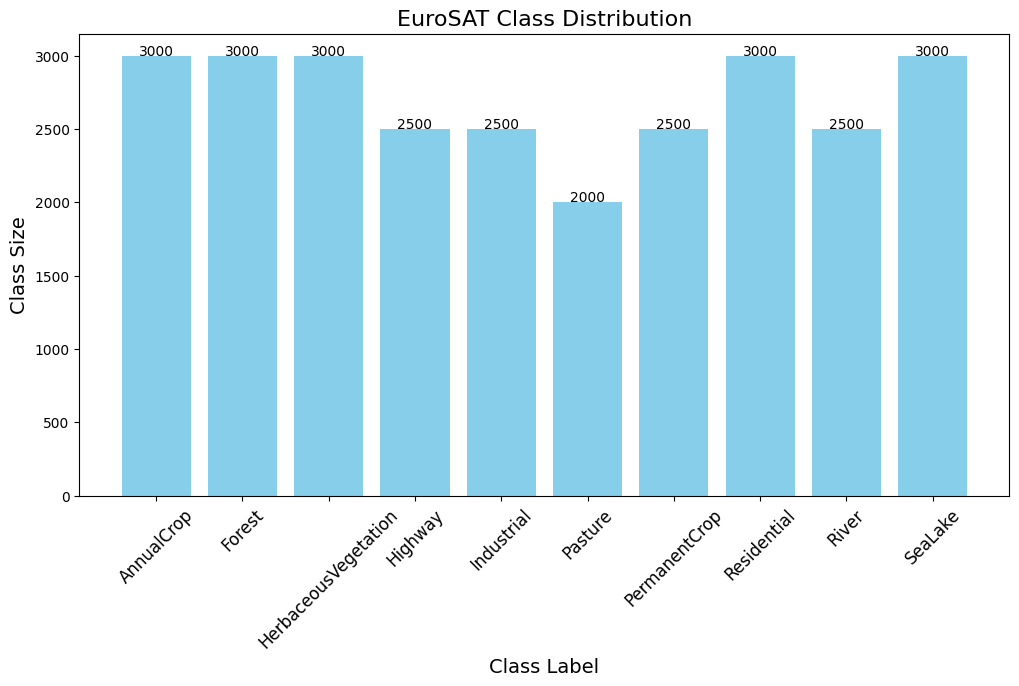

In [16]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Ensure only directories are counted
counts = {}

for l in LABELS:
    class_path = os.path.join(DATASET, l)
    if os.path.isdir(class_path):  # ✅ Check if it's a directory
        counts[l] = len(os.listdir(class_path))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')

# Format labels
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Class Size', fontsize=14)
plt.title('EuroSAT Class Distribution', fontsize=16)

# Add value labels
for i, v in enumerate(counts.values()):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.show()


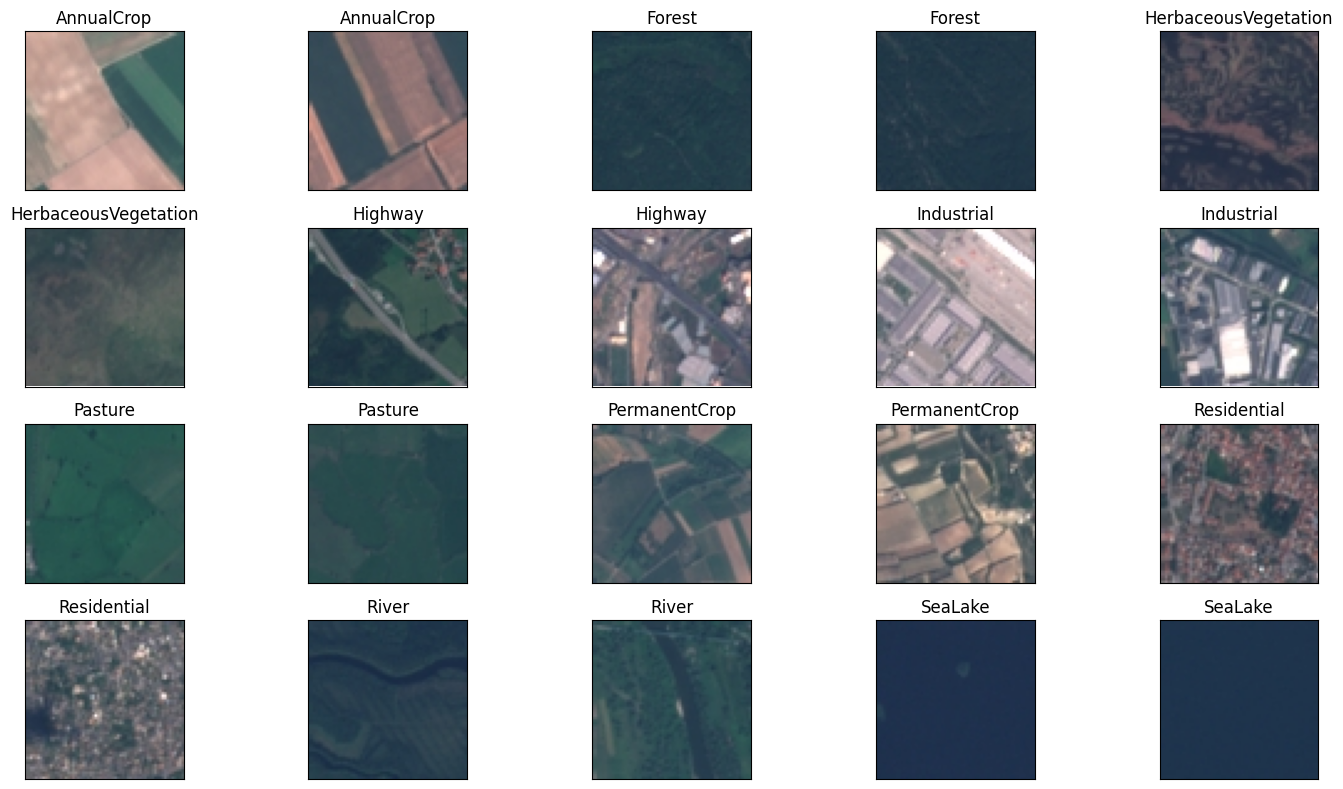

In [17]:
import os
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt

# Ensure LABELS contains only directories
valid_labels = [l for l in LABELS if os.path.isdir(os.path.join(DATASET, l))]

# Collect valid image paths
img_paths = []

for l in valid_labels:
    for suffix in ['1000.jpg', '2000.jpg']:
        img_path = os.path.join(DATASET, l, f"{l}_{suffix}")
        if os.path.exists(img_path):  # ✅ Check if file exists before adding
            img_paths.append(img_path)

# Function to plot images
def plot_sat_imgs(paths):
    if not paths:
        print("⚠️ No valid image paths found! Check dataset structure.")
        return

    plt.figure(figsize=(15, 8))
    
    num_imgs = min(len(paths), 20)  # ✅ Prevent IndexError
    
    for i in range(num_imgs):
        plt.subplot(4, 5, i + 1, xticks=[], yticks=[])

        try:
            img = PIL.Image.open(paths[i])  # ✅ Removed 'r' mode
            plt.imshow(np.asarray(img))
            plt.title(os.path.basename(os.path.dirname(paths[i])))  # ✅ Correct path handling
        except Exception as e:
            print(f"Error loading {paths[i]}: {e}")

    plt.tight_layout()
    plt.show()

# Plot images
plot_sat_imgs(img_paths)


In [18]:
import os
import re
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ✅ Corrected import

# Ensure LABELS is defined (replace with actual class names if needed)
LABELS = ["class1", "class2", "class3"]  # Example classes, replace with actual

# Define dataset paths
TRAIN_DIR = '../working/training'
TEST_DIR = '../working/testing'
BATCH_SIZE = 64
NUM_CLASSES = len(LABELS)
INPUT_SHAPE = (64, 64, 3)
CLASS_MODE = 'categorical'

# ✅ Create training and testing directories if they don't exist
for path in (TRAIN_DIR, TEST_DIR):
    os.makedirs(path, exist_ok=True)

# ✅ Create class label subdirectories in train and test
for label in LABELS:
    os.makedirs(os.path.join(TRAIN_DIR, label), exist_ok=True)
    os.makedirs(os.path.join(TEST_DIR, label), exist_ok=True)

print("✅ Training and Testing directories set up successfully.")


✅ Training and Testing directories set up successfully.


In [19]:
import os
import re
import shutil
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit

# Ensure correct dataset path
DATASET = "D:/dataset/archive (1)/EuroSAT"  # Adjust if necessary

# Get class labels dynamically
LABELS = [d for d in os.listdir(DATASET) if os.path.isdir(os.path.join(DATASET, d))]
print("✅ Available Labels:", LABELS)

# Map each image path to its class label in 'data'
data = {}

for label in LABELS:
    label_path = os.path.join(DATASET, label)

    if not os.path.exists(label_path):
        print(f"⚠️ Warning: Directory {label_path} does not exist. Skipping...")
        continue  # Skip missing directories

    for img in os.listdir(label_path):
        img_path = os.path.join(label_path, img)
        if os.path.isfile(img_path):  # Ensure it's a file
            data[img_path] = label

# Convert data dictionary to pandas Series
X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(list(data.values())))

# Define stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

# Training & Testing directories
TRAIN_DIR = "../working/training"
TEST_DIR = "../working/testing"

# Ensure directories exist
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

# Split dataset
for train_idx, test_idx in split.split(X, y):
    train_paths = X.iloc[train_idx]
    test_paths = X.iloc[test_idx]

    # Replace dataset path with training/testing paths
    new_train_paths = [os.path.join(TRAIN_DIR, os.path.basename(p)) for p in train_paths]
    new_test_paths = [os.path.join(TEST_DIR, os.path.basename(p)) for p in test_paths]

    train_path_map = list(zip(train_paths, new_train_paths))
    test_path_map = list(zip(test_paths, new_test_paths))

    # Move files
    print("📂 Moving training files...")
    for src, dest in tqdm(train_path_map):
        if not os.path.exists(dest):
            shutil.copy(src, dest)

    print("📂 Moving testing files...")
    for src, dest in tqdm(test_path_map):
        if not os.path.exists(dest):
            shutil.copy(src, dest)

print("✅ File organization complete!")


✅ Available Labels: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
📂 Moving training files...


100%|██████████| 21600/21600 [00:00<00:00, 27151.21it/s]


📂 Moving testing files...


100%|██████████| 5400/5400 [00:00<00:00, 19828.45it/s]

✅ File organization complete!


In [20]:
# Create a ImageDataGenerator Instance which can be used for data augmentation

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
#   validation_split=0.2
)

train_generator = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    #subset='training',
    color_mode='rgb',
    shuffle=True,
    seed=69
    )
# The validation set is optional if we choose to do that
"""
valid_generator = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    subset='validation',    
    color_mode='rgb',
    shuffle=True,
    seed=69
)
"""
# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 21600 images belonging to 13 classes.
Found 5400 images belonging to 13 classes.


In [21]:
print(train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9, 'class1': 10, 'class2': 11, 'class3': 12}


In [22]:
np.save('class_indices', train_generator.class_indices)

In [23]:
# Using image data generator api in keras for making image dataset 
rf_gen = ImageDataGenerator(rescale=1./255)

rf_train_generator = rf_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    # by using batch_size as training data size we can extract data from this iterator
    batch_size=21600, 
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

rf_test_generator = rf_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

Found 21600 images belonging to 13 classes.
Found 5400 images belonging to 13 classes.


In [24]:
# Get the next batch from the training generator
train = next(iter(rf_train_generator))  # Corrected approach for TensorFlow 2.x
X_train = train[0].reshape(21600, 12288)
y_train = train[1]

# Get the next batch from the testing generator
test = next(iter(rf_test_generator))  # Corrected approach for TensorFlow 2.x
X_test = test[0].reshape(5400, 12288)
y_test = test[1]


In [25]:
# Creating mini batches of training data as training on whole data is difficult
ids_1 = np.random.choice(len(X_train), size=21600, replace=False)
X_train_mini_1 = X_train[ids_1]
y_train_mini_1 = rf_train_generator.classes[ids_1]

In [26]:
# import random forest classifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score


rf_clf = ensemble.RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=7)
rf_clf.fit(X_train_mini_1, y_train_mini_1)
y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_pred, rf_test_generator.classes)
print("Accuracy Score: {0:.4}".format(acc))

Accuracy Score: 0.6263


In [27]:
from __future__ import division
from collections import Counter
import random
import numpy as np
from scipy.stats import mode


def shuffle_in_unison(a, b):
    """ Shuffles two lists of equal length and keeps corresponding elements in the same index. """
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)


def entropy(Y):
    """ In information theory, entropy is a measure of the uncertanty of a random sample from a group. """
    
    distribution = Counter(Y)
    s = 0.0
    total = len(Y)
    for y, num_y in distribution.items():
        probability_y = (num_y/total)
        s += (probability_y)*np.log(probability_y)
    return -s


def information_gain(y, y_true, y_false):
    """ The reduction in entropy from splitting data into two groups. """
    return entropy(y) - (entropy(y_true)*len(y_true) + entropy(y_false)*len(y_false))/len(y)

In [28]:
import numpy as np
import random
from scipy.stats import mode

class DecisionTreeClassifier:
    """ A decision tree classifier. """

    def __init__(self, max_features=lambda x: x, max_depth=10, min_samples_split=2):
        """
        Args:
            max_features: Function that controls the number of features to consider.
            max_depth: Maximum depth of the tree.
            min_samples_split: Minimum samples needed to split a node.
        """
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trunk = None  # Root node of the decision tree

    def fit(self, X, y):
        """ Builds the decision tree based on the dataset. """
        n_features = X.shape[1]
        n_sub_features = int(self.max_features(n_features))
        feature_indices = random.sample(range(n_features), n_sub_features)
        
        self.trunk = self.build_tree(X, y, feature_indices, 0)

    def predict(self, X):
        """ Predicts class labels for given input samples. """
        num_samples = X.shape[0]
        y_pred = np.empty(num_samples)

        for j in range(num_samples):
            node = self.trunk

            while isinstance(node, Node):
                if X[j][node.feature_index] <= node.threshold:
                    node = node.branch_true
                else:
                    node = node.branch_false
            y_pred[j] = node  # Leaf node contains the predicted class label

        return y_pred

    def build_tree(self, X, y, feature_indices, depth):
        """ Recursively builds the decision tree. """
        if depth == self.max_depth or len(y) < self.min_samples_split or entropy(y) == 0:
            return mode(y)[0][0]  # Return the most common class as a leaf

        feature_index, threshold = find_split(X, y, feature_indices)

        X_true, y_true, X_false, y_false = split(X, y, feature_index, threshold)
        if y_true.shape[0] == 0 or y_false.shape[0] == 0:
            return mode(y)[0][0]

        branch_true = self.build_tree(X_true, y_true, feature_indices, depth + 1)
        branch_false = self.build_tree(X_false, y_false, feature_indices, depth + 1)

        return Node(feature_index, threshold, branch_true, branch_false)


class Node:
    """ A node in a decision tree. """

    def __init__(self, feature_index, threshold, branch_true, branch_false):
        self.feature_index = feature_index
        self.threshold = threshold
        self.branch_true = branch_true
        self.branch_false = branch_false


def find_split(X, y, feature_indices):
    """ Finds the best feature and threshold to split on. """
    best_gain = 0
    best_feature_index = None
    best_threshold = None

    for feature_index in feature_indices:
        values = sorted(set(X[:, feature_index]))  # Unique sorted values

        for j in range(len(values) - 1):
            threshold = (values[j] + values[j + 1]) / 2
            X_true, y_true, X_false, y_false = split(X, y, feature_index, threshold)
            gain = information_gain(y, y_true, y_false)

            if gain > best_gain:
                best_gain = gain
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold


def split(X, y, feature_index, threshold):
    """ Splits dataset based on the feature and threshold. """
    X_true, y_true, X_false, y_false = [], [], [], []

    for j in range(len(y)):
        if X[j][feature_index] <= threshold:
            X_true.append(X[j])
            y_true.append(y[j])
        else:
            X_false.append(X[j])
            y_false.append(y[j])

    return np.array(X_true), np.array(y_true), np.array(X_false), np.array(y_false)


In [29]:
# Implementing Random Forest Clasifier

class RandomForestClassifier(object):
    """ A random forest classifier.
    A random forest is a collection of decision trees that vote on a
    classification decision. Each tree is trained with a subset of the data and
    features.
    """

    def __init__(self, n_estimators=32, max_features=np.sqrt, max_depth=10,
        min_samples_split=2, bootstrap=0.9):
        """
        Args:
            n_estimators: The number of decision trees in the forest.
            max_features: Controls the number of features to randomly consider
                at each split.
            max_depth: The maximum number of levels that the tree can grow
                downwards before forcefully becoming a leaf.
            min_samples_split: The minimum number of samples needed at a node to
                justify a new node split.
            bootstrap: The fraction of randomly choosen data to fit each tree on.
        """
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.bootstrap = bootstrap
        self.forest = []
    def fit(self, X, y):
        """ Creates a forest of decision trees using a random subset of data and
            features. """
        self.forest = []
        n_samples = len(y)
        n_sub_samples = round(n_samples*self.bootstrap)
        
        for i in range(self.n_estimators):
            shuffle_in_unison(X, y)
            X_subset = X[:n_sub_samples]
            y_subset = y[:n_sub_samples]

            tree = DecisionTreeClassifier(self.max_features, self.max_depth,
                                            self.min_samples_split)
            tree.fit(X_subset, y_subset)
            self.forest.append(tree)


    def predict(self, X):
        """ Predict the class of each sample in X. """
        n_samples = X.shape[0]
        n_trees = len(self.forest)
        predictions = np.empty([n_trees, n_samples])
        for i in range(n_trees):
            predictions[i] = self.forest[i].predict(X)

        return mode(predictions)[0][0]
def score(self, X, y):
        """ Return the accuracy of the prediction of X compared to y. """
        y_predict = self.predict(X)
        n_samples = len(y)
        correct = 0
        for i in range(n_samples):
            if y_predict[i] == y[i]:
                correct = correct + 1
        accuracy = correct/n_samples
        return accuracy

In [30]:
# Creating mini batches of training data as training on whole data is difficult
ids_2 = np.random.choice(len(X_train), size=2160, replace=False)
X_train_mini_2 = X_train[ids_2]
y_train_mini_2 = rf_train_generator.classes[ids_2]

In [31]:
# Import necessary library
from sklearn.ensemble import RandomForestClassifier

# Ensure the training data is properly prepared
# X_train_mini_2 should be a 2D array-like structure (e.g., DataFrame or NumPy array)
# y_train_mini_2 should be a 1D array-like structure (e.g., Series or NumPy array)

# Initialize the Random Forest classifier with 100 estimators
forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
forest.fit(X_train_mini_2, y_train_mini_2)


RandomForestClassifier(random_state=42)

In [32]:
# Ensure X_test and y_test are aligned
# Extract only the relevant subset of labels to match X_test
y_test = rf_test_generator.classes[:len(X_test)]

# Double-check the shapes
print(f"X_test shape: {X_test.shape}, y_test shape: {len(y_test)}")

# Calculate accuracy using the Random Forest model
accuracy = forest.score(X_test, y_test)

# Print the accuracy score
print(f"Accuracy Score: {accuracy:.4f}")


X_test shape: (5400, 12288), y_test shape: 5400
Accuracy Score: 0.5950


In [53]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam


from keras.applications import VGG16, VGG19
from keras.applications import ResNet50, ResNet50V2, ResNet152V2
from keras.applications import InceptionV3, Xception

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

In [54]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

In [55]:
# Note that for different CNN models we are using different setup of dense layers
def compile_model(cnn_base, input_shape, n_classes, optimizer, fine_tune=None):
    
    if (cnn_base == 'ResNet50') or (cnn_base == 'ResNet50V2') or (cnn_base == 'ResNet152V2'):
        if cnn_base == 'ResNet50':
            conv_base = ResNet50(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        elif cnn_base == 'ResNet50V2':
            conv_base = ResNet50V2(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        else:
            conv_base = ResNet152V2(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        top_model = conv_base.output
        top_model = Flatten()(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
       
    
    elif (cnn_base == 'VGG16') or (cnn_base == 'VGG19'):
        if cnn_base == 'VGG16':
            conv_base = VGG16(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
        else:
            conv_base = VGG19(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
        top_model = conv_base.output
        top_model = Flatten()(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
    
    
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs=conv_base.input, outputs=output_layer)
        
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])
    
    return model

def plot_history(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T
    results.rename(columns={0: 'Precision',
                           1: 'Recall',
                           2: 'F-Score',
                           3: 'Support'}, inplace=True)
    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_preds), 
                            columns=class_labels,
                            index=class_labels)    
    f2 = fbeta_score(y_true, y_preds, beta=2, average='micro')
    accuracy = accuracy_score(y_true, y_preds)
    print(f"Accuracy: {accuracy}")
    print(f"Global F2 Score: {f2}")    
    return results, conf_mat

def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = np.argmax(y_preds[idx])
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

In [56]:
N_STEPS = train_generator.samples//BATCH_SIZE
N_VAL_STEPS = test_generator.samples//BATCH_SIZE
N_EPOCHS = 100
num_classes = 13  
# model callbacks
checkpoint = ModelCheckpoint(filepath='../working/model.weights.best.keras',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

In [57]:
resnet50_model = compile_model('ResNet50', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-2), fine_tune=None)
resnet50_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 40,373,123 (154.01 MB)

 Trainable params: 16,785,411 (64.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [58]:
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples//BATCH_SIZE
N_VAL_STEPS = test_generator.samples//BATCH_SIZE
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='../working/model.weights.best.keras',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

In [61]:
NUM_CLASSES = 13  # Ensure this is set correctly

resnet50_model = compile_model('ResNet50', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-2), fine_tune=None)
resnet50_model.summary()

# Reset generators to avoid any mismatches
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples // BATCH_SIZE
N_VAL_STEPS = test_generator.samples // BATCH_SIZE

# Ensure the generators output categorical labels
assert train_generator.num_classes == NUM_CLASSES, f"Mismatch: train_generator has {train_generator.num_classes} classes"
assert test_generator.num_classes == NUM_CLASSES, f"Mismatch: test_generator has {test_generator.num_classes} classes"

# Train the model
resnet50_history = resnet50_model.fit(
    train_generator,
    steps_per_epoch=N_STEPS,
    epochs=50,
    callbacks=[early_stop, checkpoint],
    validation_data=test_generator,
    validation_steps=N_VAL_STEPS
)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 40,393,613 (154.09 MB)

 Trainable params: 16,805,901 (64.11 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - categorical_accuracy: 0.1884 - loss: 4.2824
Epoch 1: val_categorical_accuracy improved from -inf to 0.33333, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 118s 321ms/step - categorical_accuracy: 0.1886 - loss: 4.2770 - val_categorical_accuracy: 0.3333 - val_loss: 1.6611
Epoch 2/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 1:42 306ms/step - categorical_accuracy: 0.2344 - loss: 1.8037

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_categorical_accuracy improved from 0.33333 to 0.35026, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - categorical_accuracy: 0.2344 - loss: 1.8037 - val_categorical_accuracy: 0.3503 - val_loss: 1.6728
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - categorical_accuracy: 0.3021 - loss: 1.7921
Epoch 3: val_categorical_accuracy improved from 0.35026 to 0.39509, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 101s 299ms/step - categorical_accuracy: 0.3021 - loss: 1.7921 - val_categorical_accuracy: 0.3951 - val_loss: 1.5612
Epoch 4/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 1:24 252ms/step - categorical_accuracy: 0.3125 - loss: 1.7517
Epoch 4: val_categorical_accuracy improved from 0.39509 to 0.40811, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - categorical_accuracy: 0.3125 - loss: 1.7517 - val_categorical_accuracy: 0.4081 - val_loss: 1.5342
Epoch 

In [62]:
# re-train whole network end2end 
resnet50_model = compile_model('ResNet50', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-4), fine_tune=0)

resnet50_model.load_weights('../working/model.weights.best.keras')

train_generator.reset()
test_generator.reset()

resnet50_history = resnet50_model.fit(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=N_EPOCHS,
                             callbacks=[early_stop, checkpoint, reduce_lr],
                             validation_data=test_generator,
                             validation_steps=N_VAL_STEPS)

Epoch 1/100


c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - categorical_accuracy: 0.6143 - loss: 6.6786
Epoch 1: val_categorical_accuracy did not improve from 0.49870
337/337 ━━━━━━━━━━━━━━━━━━━━ 263s 714ms/step - categorical_accuracy: 0.6147 - loss: 6.6654 - val_categorical_accuracy: 0.0270 - val_loss: 31.2922 - learning_rate: 1.0000e-04
Epoch 2/100
  1/337 ━━━━━━━━━━━━━━━━━━━━ 3:40 656ms/step - categorical_accuracy: 0.7188 - loss: 0.7089
Epoch 2: val_categorical_accuracy did not improve from 0.49870
337/337 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - categorical_accuracy: 0.7188 - loss: 0.7089 - val_categorical_accuracy: 0.0268 - val_loss: 31.6387 - learning_rate: 1.0000e-04
Epoch 3/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - categorical_accuracy: 0.8749 - loss: 0.4068
Epoch 3: val_categorical_accuracy did not improve from 0.49870
337/337 ━━━━━━━━━━━━━━━━━━━━ 249s 738ms/step - categorical_accuracy: 0.8749 - loss: 0.4067 - val_categorical_accuracy: 0.1715 - val_loss: 8.6599 - learning_rate: 1.0000e-04

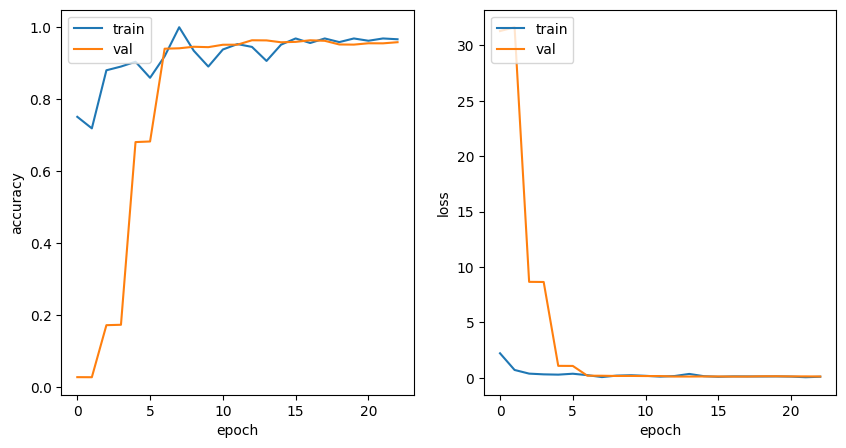

In [63]:
plot_history(resnet50_history)

In [64]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pandas as pd

def display_results(y_true, y_preds, class_labels):
    num_classes = len(class_labels)  # Ensure all classes are included

    # Ensure all classes are considered, even if missing in predictions
    results = pd.DataFrame(
        precision_recall_fscore_support(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels
    ).T

    results.rename(columns={0: 'Precision', 
                            1: 'Recall', 
                            2: 'F-Score', 
                            3: 'Support'}, inplace=True)

    conf_mat = pd.DataFrame(
        confusion_matrix(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels,
        index=class_labels
    )

    return results, conf_mat


import numpy as np

# Load pre-trained weights
resnet50_model.load_weights('../working/model.weights.best.keras')

# Get class indices and reverse the dictionary
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}

# Create a new test generator
test_generator_new = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,  # No labels needed for predictions
    color_mode='rgb',
    shuffle=False,
    seed=69
)

# Ensure generator is reset before making predictions
test_generator_new.reset()

# Convert generator output to NumPy array
image_data = np.array([test_generator_new[i] for i in range(len(test_generator_new))])

# Ensure correct shape (batch_size, height, width, channels)
image_data = np.squeeze(image_data)  # Remove redundant dimensions if needed

# Use predict() instead of predict_generator()
predictions = resnet50_model.predict(image_data, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels from generator
true_classes = test_generator_new.classes

# Display results
prf, conf_mat = display_results(true_classes, predicted_classes, list(class_indices.values()))
prf


Found 5400 images belonging to 13 classes.
169/169 ━━━━━━━━━━━━━━━━━━━━ 57s 325ms/step


c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Precision    Recall   F-Score  Support
AnnualCrop             0.972743  0.951667  0.962089    600.0
Forest                 0.955128  0.993333  0.973856    600.0
HerbaceousVegetation   0.963855  0.933333  0.948349    600.0
Highway                0.945892  0.944000  0.944945    500.0
Industrial             0.983607  0.960000  0.971660    500.0
Pasture                0.966921  0.950000  0.958386    400.0
PermanentCrop          0.933071  0.948000  0.940476    500.0
Residential            0.946372  1.000000  0.972447    600.0
River                  0.975610  0.960000  0.967742    500.0
SeaLake                0.994949  0.985000  0.989950    600.0
class1                 0.000000  0.000000  0.000000      0.0
class2                 0.000000  0.000000  0.000000      0.0
class3                 0.000000  0.000000  0.000000      0.0

In [65]:
# Save the model and the weights
resnet50_model.save('../working/ResNet50_eurosat.h5')

 ResNet50V2 Model

In [66]:
resnet50V2_model = compile_model('ResNet50V2', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-2), fine_tune=None)
resnet50V2_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 18, 18,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 16, 16,    │          0 │ conv2_block1_0_c

 Total params: 40,370,701 (154.00 MB)

 Trainable params: 16,805,901 (64.11 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [67]:
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples//BATCH_SIZE
N_VAL_STEPS = test_generator.samples//BATCH_SIZE
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='../working/model.weights.best.keras',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

In [68]:
# First Pretraining the dense layer
resnet50V2_history = resnet50V2_model.fit(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=50,
                             callbacks=[early_stop, checkpoint],
                             validation_data=test_generator,
                             validation_steps=N_VAL_STEPS)

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - categorical_accuracy: 0.6033 - loss: 4.6698
Epoch 1: val_categorical_accuracy improved from -inf to 0.73084, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 137s 383ms/step - categorical_accuracy: 0.6035 - loss: 4.6621 - val_categorical_accuracy: 0.7308 - val_loss: 0.9394
Epoch 2/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 1:19 238ms/step - categorical_accuracy: 0.6719 - loss: 1.5055

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_categorical_accuracy improved from 0.73084 to 0.73624, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - categorical_accuracy: 0.6719 - loss: 1.5055 - val_categorical_accuracy: 0.7362 - val_loss: 0.9225
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - categorical_accuracy: 0.6764 - loss: 1.1659
Epoch 3: val_categorical_accuracy improved from 0.73624 to 0.75725, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 100s 298ms/step - categorical_accuracy: 0.6765 - loss: 1.1658 - val_categorical_accuracy: 0.7573 - val_loss: 0.8941
Epoch 4/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 1:20 240ms/step - categorical_accuracy: 0.7500 - loss: 0.7440
Epoch 4: val_categorical_accuracy improved from 0.75725 to 0.76451, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - categorical_accuracy: 0.7500 - loss: 0.7440 - val_categorical_accuracy: 0.7645 - val_loss: 0.8905
Epoch 

In [69]:
# Re-train whole network end-to-end
resnet50V2_model = compile_model('ResNet50V2', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-4), fine_tune=0)

# Load pre-trained weights
resnet50V2_model.load_weights('../working/model.weights.best.keras')

# Reset data generators
train_generator.reset()
test_generator.reset()

# Train the model
resnet50V2_history = resnet50V2_model.fit(  # ✅ Fixed fit_ -> fit
    train_generator,
    steps_per_epoch=N_STEPS,
    epochs=N_EPOCHS,
    callbacks=[early_stop, checkpoint, reduce_lr],
    validation_data=test_generator,
    validation_steps=N_VAL_STEPS
)


c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - categorical_accuracy: 0.5300 - loss: 2.0509
Epoch 1: val_categorical_accuracy improved from 0.81938 to 0.82050, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 278s 718ms/step - categorical_accuracy: 0.5303 - loss: 2.0488 - val_categorical_accuracy: 0.8205 - val_loss: 0.7126 - learning_rate: 1.0000e-04
Epoch 2/100
  1/337 ━━━━━━━━━━━━━━━━━━━━ 3:55 700ms/step - categorical_accuracy: 0.7344 - loss: 1.1984
Epoch 2: val_categorical_accuracy improved from 0.82050 to 0.82143, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - categorical_accuracy: 0.7344 - loss: 1.1984 - val_categorical_accuracy: 0.8214 - val_loss: 0.7038 - learning_rate: 1.0000e-04
Epoch 3/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - categorical_accuracy: 0.8040 - loss: 0.6717
Epoch 3: val_categorical_accuracy improved from 0.82143 to 0.85640, saving model to ../working/model.weights.be

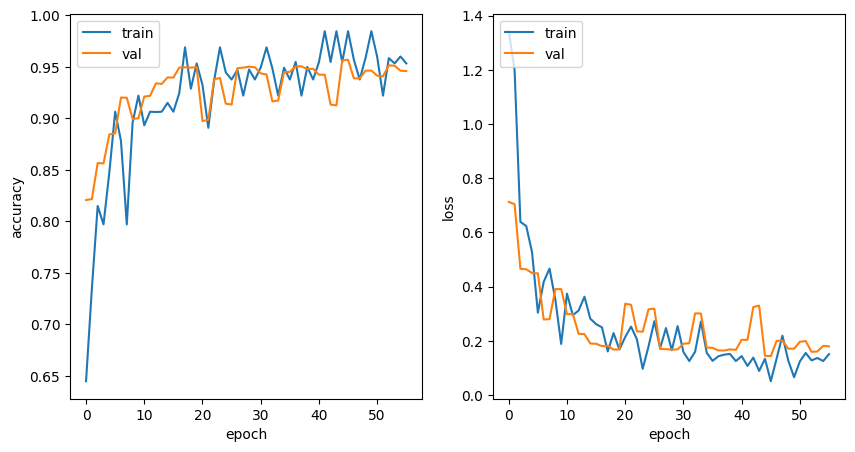

In [70]:
plot_history(resnet50V2_history)

In [71]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pandas as pd

def display_results(y_true, y_preds, class_labels):
    num_classes = len(class_labels)  # Ensure all classes are included

    # Ensure all classes are considered, even if missing in predictions
    results = pd.DataFrame(
        precision_recall_fscore_support(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels
    ).T

    results.rename(columns={0: 'Precision', 
                            1: 'Recall', 
                            2: 'F-Score', 
                            3: 'Support'}, inplace=True)

    conf_mat = pd.DataFrame(
        confusion_matrix(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels,
        index=class_labels
    )

    return results, conf_mat


import numpy as np

# Load pre-trained weights
resnet50V2_model.load_weights('../working/model.weights.best.keras')

# Get class indices and reverse the dictionary
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}

# Create a new test generator
test_generator_new = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,  # No labels needed for predictions
    color_mode='rgb',
    shuffle=False,
    seed=69
)

# Ensure generator is reset before making predictions
test_generator_new.reset()

# Convert generator output to NumPy array
image_data = np.array([test_generator_new[i] for i in range(len(test_generator_new))])

# Ensure correct shape (batch_size, height, width, channels)
image_data = np.squeeze(image_data)  # Remove redundant dimensions if needed

# Use predict() instead of predict_generator()
predictions = resnet50_model.predict(image_data, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels from generator
true_classes = test_generator_new.classes

# Display results
prf, conf_mat = display_results(true_classes, predicted_classes, list(class_indices.values()))
prf


Found 5400 images belonging to 13 classes.
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 249ms/step


c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Precision    Recall   F-Score  Support
AnnualCrop             0.972743  0.951667  0.962089    600.0
Forest                 0.955128  0.993333  0.973856    600.0
HerbaceousVegetation   0.963855  0.933333  0.948349    600.0
Highway                0.945892  0.944000  0.944945    500.0
Industrial             0.983607  0.960000  0.971660    500.0
Pasture                0.966921  0.950000  0.958386    400.0
PermanentCrop          0.933071  0.948000  0.940476    500.0
Residential            0.946372  1.000000  0.972447    600.0
River                  0.975610  0.960000  0.967742    500.0
SeaLake                0.994949  0.985000  0.989950    600.0
class1                 0.000000  0.000000  0.000000      0.0
class2                 0.000000  0.000000  0.000000      0.0
class3                 0.000000  0.000000  0.000000      0.0

In [72]:
# Save the model and the weights
resnet50V2_model.save('../working/ResNet50V2_eurosat.h5')

ResNet152V2 Model

In [73]:
resnet152V2_model = compile_model('ResNet152V2', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-2), fine_tune=None)
resnet152V2_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 18, 18,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 16, 16,    │          0 │ conv2_block1_0_c

 Total params: 75,137,549 (286.63 MB)

 Trainable params: 16,805,901 (64.11 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [74]:
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples//BATCH_SIZE
N_VAL_STEPS = test_generator.samples//BATCH_SIZE
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='../working/model.weights.best.keras',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

In [75]:
# First Pretraining the dense layer
resnet152V2_history = resnet152V2_model.fit(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=50,
                             callbacks=[early_stop, checkpoint],
                             validation_data=test_generator,
                             validation_steps=N_VAL_STEPS)

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - categorical_accuracy: 0.5872 - loss: 2.5235
Epoch 1: val_categorical_accuracy improved from -inf to 0.72991, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 210s 586ms/step - categorical_accuracy: 0.5874 - loss: 2.5212 - val_categorical_accuracy: 0.7299 - val_loss: 1.3027
Epoch 2/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 2:30 448ms/step - categorical_accuracy: 0.6094 - loss: 1.3206

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_categorical_accuracy improved from 0.72991 to 0.73010, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 36s 106ms/step - categorical_accuracy: 0.6094 - loss: 1.3206 - val_categorical_accuracy: 0.7301 - val_loss: 1.2426
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - categorical_accuracy: 0.6816 - loss: 1.3803
Epoch 3: val_categorical_accuracy improved from 0.73010 to 0.75335, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 191s 566ms/step - categorical_accuracy: 0.6816 - loss: 1.3803 - val_categorical_accuracy: 0.7533 - val_loss: 1.0500
Epoch 4/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 2:37 469ms/step - categorical_accuracy: 0.7500 - loss: 0.8129
Epoch 4: val_categorical_accuracy improved from 0.75335 to 0.75372, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 36s 107ms/step - categorical_accuracy: 0.7500 - loss: 0.8129 - val_categorical_accuracy: 0.7537 - val_loss: 1.0573
Epoc

In [76]:
# Re-train whole network end-to-end
resnet152V2_model = compile_model('ResNet152V2', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-4), fine_tune=0)

# Load pre-trained weights
resnet152V2_model.load_weights('../working/model.weights.best.keras')

# Reset data generators
train_generator.reset()
test_generator.reset()

# Train the model
resnet152V2_history = resnet152V2_model.fit(  # ✅ Fixed fit_ -> fit
    train_generator,
    steps_per_epoch=N_STEPS,
    epochs=N_EPOCHS,
    callbacks=[early_stop, checkpoint, reduce_lr],
    validation_data=test_generator,
    validation_steps=N_VAL_STEPS
)


Epoch 1/100


c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.5412 - loss: 2.4337
Epoch 1: val_categorical_accuracy did not improve from 0.81120
337/337 ━━━━━━━━━━━━━━━━━━━━ 673s 2s/step - categorical_accuracy: 0.5414 - loss: 2.4313 - val_categorical_accuracy: 0.7089 - val_loss: 1.0455 - learning_rate: 1.0000e-04
Epoch 2/100
  1/337 ━━━━━━━━━━━━━━━━━━━━ 9:36 2s/step - categorical_accuracy: 0.6719 - loss: 0.9725
Epoch 2: val_categorical_accuracy did not improve from 0.81120
337/337 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - categorical_accuracy: 0.6719 - loss: 0.9725 - val_categorical_accuracy: 0.7148 - val_loss: 1.0428 - learning_rate: 1.0000e-04
Epoch 3/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - categorical_accuracy: 0.7363 - loss: 0.8871
Epoch 3: val_categorical_accuracy improved from 0.81120 to 0.87742, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 963s 3s/step - categorical_accuracy: 0.7364 - loss: 0.8868 - val_categorical_accuracy: 0.8774 - val

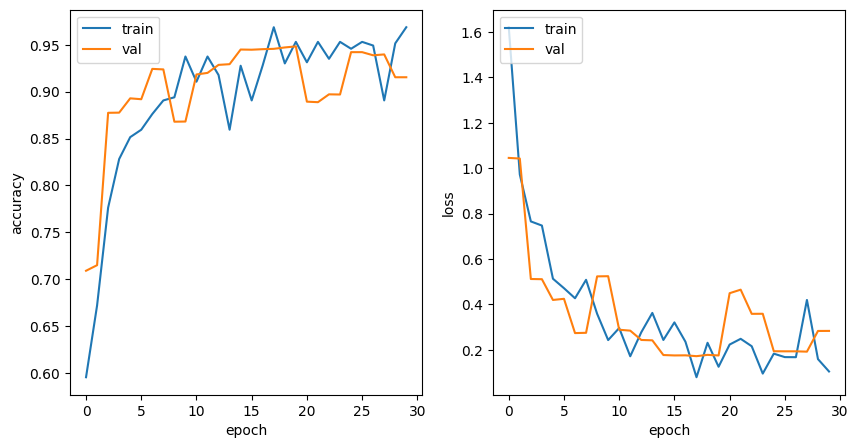

In [77]:
plot_history(resnet152V2_history)

In [78]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pandas as pd

def display_results(y_true, y_preds, class_labels):
    num_classes = len(class_labels)  # Ensure all classes are included

    # Ensure all classes are considered, even if missing in predictions
    results = pd.DataFrame(
        precision_recall_fscore_support(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels
    ).T

    results.rename(columns={0: 'Precision', 
                            1: 'Recall', 
                            2: 'F-Score', 
                            3: 'Support'}, inplace=True)

    conf_mat = pd.DataFrame(
        confusion_matrix(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels,
        index=class_labels
    )

    return results, conf_mat


import numpy as np

# Load pre-trained weights
resnet152V2_model.load_weights('../working/model.weights.best.keras')

# Get class indices and reverse the dictionary
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}

# Create a new test generator
test_generator_new = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,  # No labels needed for predictions
    color_mode='rgb',
    shuffle=False,
    seed=69
)

# Ensure generator is reset before making predictions
test_generator_new.reset()

# Convert generator output to NumPy array
image_data = np.array([test_generator_new[i] for i in range(len(test_generator_new))])

# Ensure correct shape (batch_size, height, width, channels)
image_data = np.squeeze(image_data)  # Remove redundant dimensions if needed

# Use predict() instead of predict_generator()
predictions = resnet152V2_model.predict(image_data, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels from generator
true_classes = test_generator_new.classes

# Display results
prf, conf_mat = display_results(true_classes, predicted_classes, list(class_indices.values()))
prf


Found 5400 images belonging to 13 classes.
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 919ms/step


c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Precision    Recall   F-Score  Support
AnnualCrop             0.962457  0.940000  0.951096    600.0
Forest                 0.935937  0.998333  0.966129    600.0
HerbaceousVegetation   0.949477  0.908333  0.928450    600.0
Highway                0.929134  0.944000  0.936508    500.0
Industrial             0.984979  0.918000  0.950311    500.0
Pasture                0.970822  0.915000  0.942085    400.0
PermanentCrop          0.913306  0.906000  0.909639    500.0
Residential            0.892377  0.995000  0.940898    600.0
River                  0.969880  0.966000  0.967936    500.0
SeaLake                0.996587  0.973333  0.984823    600.0
class1                 0.000000  0.000000  0.000000      0.0
class2                 0.000000  0.000000  0.000000      0.0
class3                 0.000000  0.000000  0.000000      0.0

In [79]:
# Save the model and the weights
resnet152V2_model.save('../working/ResNet152V2_eurosat.h5')

VGG16 Model

In [81]:
vgg16_model = compile_model('VGG16', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-2), fine_tune=None)
vgg16_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 13)             │        26,63

 Total params: 23,134,029 (88.25 MB)

 Trainable params: 8,419,341 (32.12 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [82]:
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples//BATCH_SIZE
N_VAL_STEPS = test_generator.samples//BATCH_SIZE
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='../working/model.weights.best.keras',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

In [84]:
train_generator.reset()
# First Pretraining the dense layer
vgg16_history = vgg16_model.fit(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=50,
                             callbacks=[early_stop, checkpoint],
                             validation_data=test_generator,
                             validation_steps=N_VAL_STEPS)

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - categorical_accuracy: 0.4695 - loss: 4.8122
Epoch 1: val_categorical_accuracy improved from -inf to 0.71540, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 146s 430ms/step - categorical_accuracy: 0.4698 - loss: 4.8038 - val_categorical_accuracy: 0.7154 - val_loss: 0.8784
Epoch 2/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 1:48 324ms/step - categorical_accuracy: 0.6250 - loss: 0.9199

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_categorical_accuracy improved from 0.71540 to 0.71577, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - categorical_accuracy: 0.6250 - loss: 0.9199 - val_categorical_accuracy: 0.7158 - val_loss: 0.9053
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - categorical_accuracy: 0.6268 - loss: 1.0785
Epoch 3: val_categorical_accuracy improved from 0.71577 to 0.75446, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 133s 393ms/step - categorical_accuracy: 0.6268 - loss: 1.0784 - val_categorical_accuracy: 0.7545 - val_loss: 0.7496
Epoch 4/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 1:46 316ms/step - categorical_accuracy: 0.6719 - loss: 0.9642
Epoch 4: val_categorical_accuracy did not improve from 0.75446
337/337 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - categorical_accuracy: 0.6719 - loss: 0.9642 - val_categorical_accuracy: 0.7455 - val_loss: 0.8155
Epoch 5/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - categor

In [86]:
# Re-train whole network end-to-end
vgg16_model_model = compile_model('VGG16', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-4), fine_tune=0)

# Load pre-trained weights
vgg16_model.load_weights('../working/model.weights.best.keras')

# Reset data generators
train_generator.reset()
test_generator.reset()

# Train the model
vgg16_history = vgg16_model.fit(  # ✅ Fixed fit_ -> fit
    train_generator,
    steps_per_epoch=N_STEPS,
    epochs=N_EPOCHS,
    callbacks=[early_stop, checkpoint, reduce_lr],
    validation_data=test_generator,
    validation_steps=N_VAL_STEPS
)


Epoch 1/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - categorical_accuracy: 0.7005 - loss: 0.9203
Epoch 1: val_categorical_accuracy did not improve from 0.81901
337/337 ━━━━━━━━━━━━━━━━━━━━ 129s 384ms/step - categorical_accuracy: 0.7005 - loss: 0.9204 - val_categorical_accuracy: 0.7764 - val_loss: 0.6937 - learning_rate: 0.0100
Epoch 2/100
  1/337 ━━━━━━━━━━━━━━━━━━━━ 1:46 316ms/step - categorical_accuracy: 0.6406 - loss: 1.0320

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_categorical_accuracy did not improve from 0.81901
337/337 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step - categorical_accuracy: 0.6406 - loss: 1.0320 - val_categorical_accuracy: 0.7653 - val_loss: 0.7223 - learning_rate: 0.0100
Epoch 3/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - categorical_accuracy: 0.7016 - loss: 0.9173
Epoch 3: val_categorical_accuracy did not improve from 0.81901
337/337 ━━━━━━━━━━━━━━━━━━━━ 135s 402ms/step - categorical_accuracy: 0.7016 - loss: 0.9173 - val_categorical_accuracy: 0.7465 - val_loss: 0.7502 - learning_rate: 0.0100
Epoch 4/100
  1/337 ━━━━━━━━━━━━━━━━━━━━ 1:50 330ms/step - categorical_accuracy: 0.6719 - loss: 0.7673
Epoch 4: val_categorical_accuracy did not improve from 0.81901
337/337 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - categorical_accuracy: 0.6719 - loss: 0.7673 - val_categorical_accuracy: 0.7251 - val_loss: 0.8042 - learning_rate: 0.0100
Epoch 5/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - categorical_accuracy: 0.7150 - loss: 0.8616
Ep

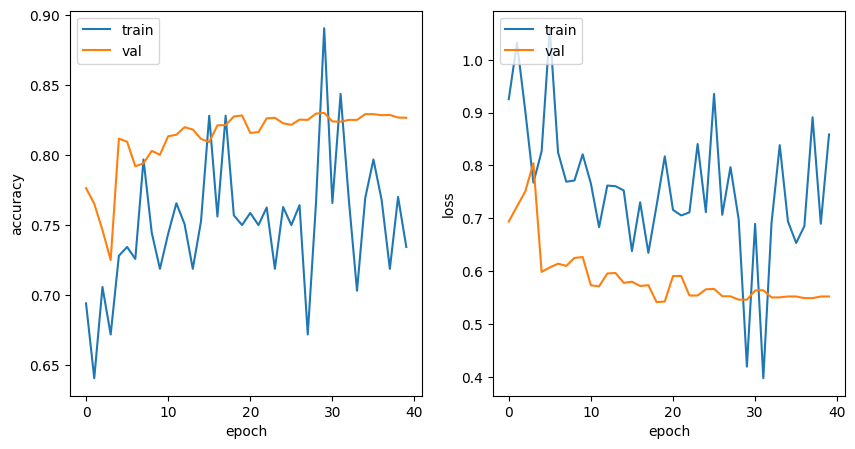

In [87]:
plot_history(vgg16_history)

In [88]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pandas as pd

def display_results(y_true, y_preds, class_labels):
    num_classes = len(class_labels)  # Ensure all classes are included

    # Ensure all classes are considered, even if missing in predictions
    results = pd.DataFrame(
        precision_recall_fscore_support(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels
    ).T

    results.rename(columns={0: 'Precision', 
                            1: 'Recall', 
                            2: 'F-Score', 
                            3: 'Support'}, inplace=True)

    conf_mat = pd.DataFrame(
        confusion_matrix(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels,
        index=class_labels
    )

    return results, conf_mat


import numpy as np

# Load pre-trained weights
vgg16_model.load_weights('../working/model.weights.best.keras')

# Get class indices and reverse the dictionary
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}

# Create a new test generator
test_generator_new = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,  # No labels needed for predictions
    color_mode='rgb',
    shuffle=False,
    seed=69
)

# Ensure generator is reset before making predictions
test_generator_new.reset()

# Convert generator output to NumPy array
image_data = np.array([test_generator_new[i] for i in range(len(test_generator_new))])

# Ensure correct shape (batch_size, height, width, channels)
image_data = np.squeeze(image_data)  # Remove redundant dimensions if needed

# Use predict() instead of predict_generator()
predictions = vgg16_model.predict(image_data, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels from generator
true_classes = test_generator_new.classes

# Display results
prf, conf_mat = display_results(true_classes, predicted_classes, list(class_indices.values()))
prf


Found 5400 images belonging to 13 classes.
169/169 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step


c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Precision    Recall   F-Score  Support
AnnualCrop             0.887255  0.905000  0.896040    600.0
Forest                 0.953571  0.890000  0.920690    600.0
HerbaceousVegetation   0.870787  0.775000  0.820106    600.0
Highway                0.752525  0.596000  0.665179    500.0
Industrial             0.915323  0.908000  0.911647    500.0
Pasture                0.678652  0.755000  0.714793    400.0
PermanentCrop          0.733855  0.750000  0.741840    500.0
Residential            0.766753  0.991667  0.864826    600.0
River                  0.732919  0.708000  0.720244    500.0
SeaLake                0.964225  0.943333  0.953665    600.0
class1                 0.000000  0.000000  0.000000      0.0
class2                 0.000000  0.000000  0.000000      0.0
class3                 0.000000  0.000000  0.000000      0.0

In [89]:
# Save the model and the weights
vgg16_model.save('../working/vgg16_eurosat.h5')

VGG19 Model

In [90]:
vgg19_model = compile_model('VGG19', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-2), fine_tune=None)
vgg19_model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 2048)           │             

 Total params: 28,443,725 (108.50 MB)

 Trainable params: 8,419,341 (32.12 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [91]:
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples//BATCH_SIZE
N_VAL_STEPS = test_generator.samples//BATCH_SIZE
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='../working/model.weights.best.keras',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

In [92]:
train_generator.reset()
# First Pretraining the dense layer
vgg19_history = vgg19_model.fit(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=50,
                             callbacks=[early_stop, checkpoint],
                             validation_data=test_generator,
                             validation_steps=N_VAL_STEPS)

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - categorical_accuracy: 0.4156 - loss: 6.3956
Epoch 1: val_categorical_accuracy improved from -inf to 0.61570, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 184s 543ms/step - categorical_accuracy: 0.4158 - loss: 6.3837 - val_categorical_accuracy: 0.6157 - val_loss: 1.0778
Epoch 2/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 2:13 397ms/step - categorical_accuracy: 0.5938 - loss: 1.3022

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_categorical_accuracy did not improve from 0.61570
337/337 ━━━━━━━━━━━━━━━━━━━━ 31s 92ms/step - categorical_accuracy: 0.5938 - loss: 1.3022 - val_categorical_accuracy: 0.6114 - val_loss: 1.0804
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - categorical_accuracy: 0.5418 - loss: 1.2607
Epoch 3: val_categorical_accuracy did not improve from 0.61570
337/337 ━━━━━━━━━━━━━━━━━━━━ 170s 505ms/step - categorical_accuracy: 0.5418 - loss: 1.2606 - val_categorical_accuracy: 0.5995 - val_loss: 1.0729
Epoch 4/50
  1/337 ━━━━━━━━━━━━━━━━━━━━ 2:18 412ms/step - categorical_accuracy: 0.4531 - loss: 1.4204
Epoch 4: val_categorical_accuracy improved from 0.61570 to 0.62388, saving model to ../working/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - categorical_accuracy: 0.4531 - loss: 1.4204 - val_categorical_accuracy: 0.6239 - val_loss: 1.0612
Epoch 5/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - categorical_accuracy: 0.5679 - loss: 1.2116
Epoch 5: val_catego

In [97]:
# re-train whole network end2end 
vgg19_model = compile_model('VGG19', INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-4), fine_tune=0)

vgg19_model.load_weights('../working/model.weights.best.keras')

train_generator.reset()
test_generator.reset()

vgg19_history = vgg19_model.fit(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=N_EPOCHS,
                             callbacks=[early_stop, checkpoint, reduce_lr],
                             validation_data=test_generator,
                             validation_steps=N_VAL_STEPS)

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.2147 - loss: 2.9899
Epoch 1: val_categorical_accuracy did not improve from 0.73438
337/337 ━━━━━━━━━━━━━━━━━━━━ 446s 1s/step - categorical_accuracy: 0.2149 - loss: 2.9876 - val_categorical_accuracy: 0.4939 - val_loss: 1.3856 - learning_rate: 1.0000e-04
Epoch 2/100
  1/337 ━━━━━━━━━━━━━━━━━━━━ 7:05 1s/step - categorical_accuracy: 0.5312 - loss: 1.5755

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_categorical_accuracy did not improve from 0.73438
337/337 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - categorical_accuracy: 0.5312 - loss: 1.5755 - val_categorical_accuracy: 0.5028 - val_loss: 1.2960 - learning_rate: 1.0000e-04
Epoch 3/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.4769 - loss: 1.4437
Epoch 3: val_categorical_accuracy did not improve from 0.73438
337/337 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - categorical_accuracy: 0.4770 - loss: 1.4434 - val_categorical_accuracy: 0.7044 - val_loss: 0.9352 - learning_rate: 1.0000e-04
Epoch 4/100
  1/337 ━━━━━━━━━━━━━━━━━━━━ 6:53 1s/step - categorical_accuracy: 0.7188 - loss: 0.9861
Epoch 4: val_categorical_accuracy did not improve from 0.73438
337/337 ━━━━━━━━━━━━━━━━━━━━ 33s 96ms/step - categorical_accuracy: 0.7188 - loss: 0.9861 - val_categorical_accuracy: 0.7210 - val_loss: 0.8684 - learning_rate: 1.0000e-04
Epoch 5/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.6192 - loss: 1.0862
Ep

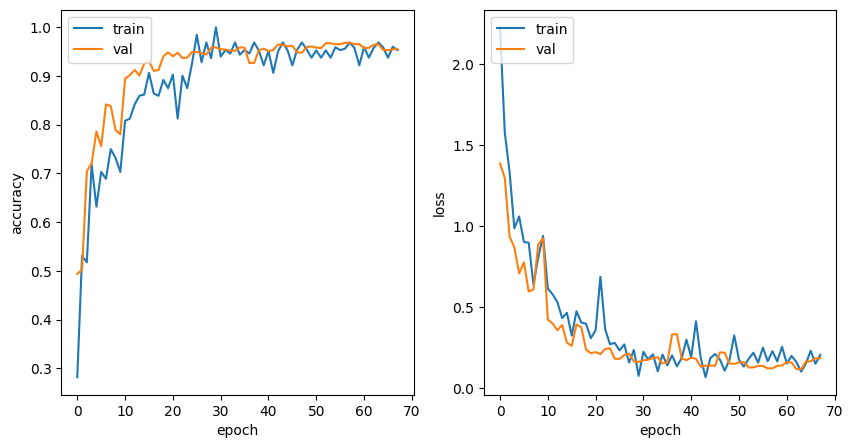

In [98]:
plot_history(vgg19_history)

In [102]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pandas as pd

def display_results(y_true, y_preds, class_labels):
    num_classes = len(class_labels)  # Ensure all classes are included

    # Ensure all classes are considered, even if missing in predictions
    results = pd.DataFrame(
        precision_recall_fscore_support(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels
    ).T

    results.rename(columns={0: 'Precision', 
                            1: 'Recall', 
                            2: 'F-Score', 
                            3: 'Support'}, inplace=True)

    conf_mat = pd.DataFrame(
        confusion_matrix(y_true, y_preds, labels=range(num_classes)),  # Fix here
        columns=class_labels,
        index=class_labels
    )

    return results, conf_mat


import numpy as np

# Load pre-trained weights
vgg19_model.load_weights('../working/model.weights.best.keras')

# Get class indices and reverse the dictionary
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}

# Create a new test generator
test_generator_new = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,  # No labels needed for predictions
    color_mode='rgb',
    shuffle=False,
    seed=69
)

# Ensure generator is reset before making predictions
test_generator_new.reset()

# Convert generator output to NumPy array
image_data = np.array([test_generator_new[i] for i in range(len(test_generator_new))])

# Ensure correct shape (batch_size, height, width, channels)
image_data = np.squeeze(image_data)  # Remove redundant dimensions if needed

# Use predict() instead of predict_generator()
predictions = vgg19_model.predict(image_data, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels from generator
true_classes = test_generator_new.classes

# Display results
prf, conf_mat = display_results(true_classes, predicted_classes, list(class_indices.values()))
prf


Found 5400 images belonging to 13 classes.
169/169 ━━━━━━━━━━━━━━━━━━━━ 36s 214ms/step


c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Precision    Recall   F-Score  Support
AnnualCrop             0.981100  0.951667  0.966159    600.0
Forest                 0.965964  0.993333  0.979458    600.0
HerbaceousVegetation   0.966555  0.963333  0.964942    600.0
Highway                0.965863  0.962000  0.963928    500.0
Industrial             0.985417  0.946000  0.965306    500.0
Pasture                0.979381  0.950000  0.964467    400.0
PermanentCrop          0.942574  0.952000  0.947264    500.0
Residential            0.941732  0.996667  0.968421    600.0
River                  0.964427  0.976000  0.970179    500.0
SeaLake                0.994924  0.980000  0.987406    600.0
class1                 0.000000  0.000000  0.000000      0.0
class2                 0.000000  0.000000  0.000000      0.0
class3                 0.000000  0.000000  0.000000      0.0

In [103]:
# Save the model and the weights
vgg19_model.save('../working/vgg19_eurosat.h5')

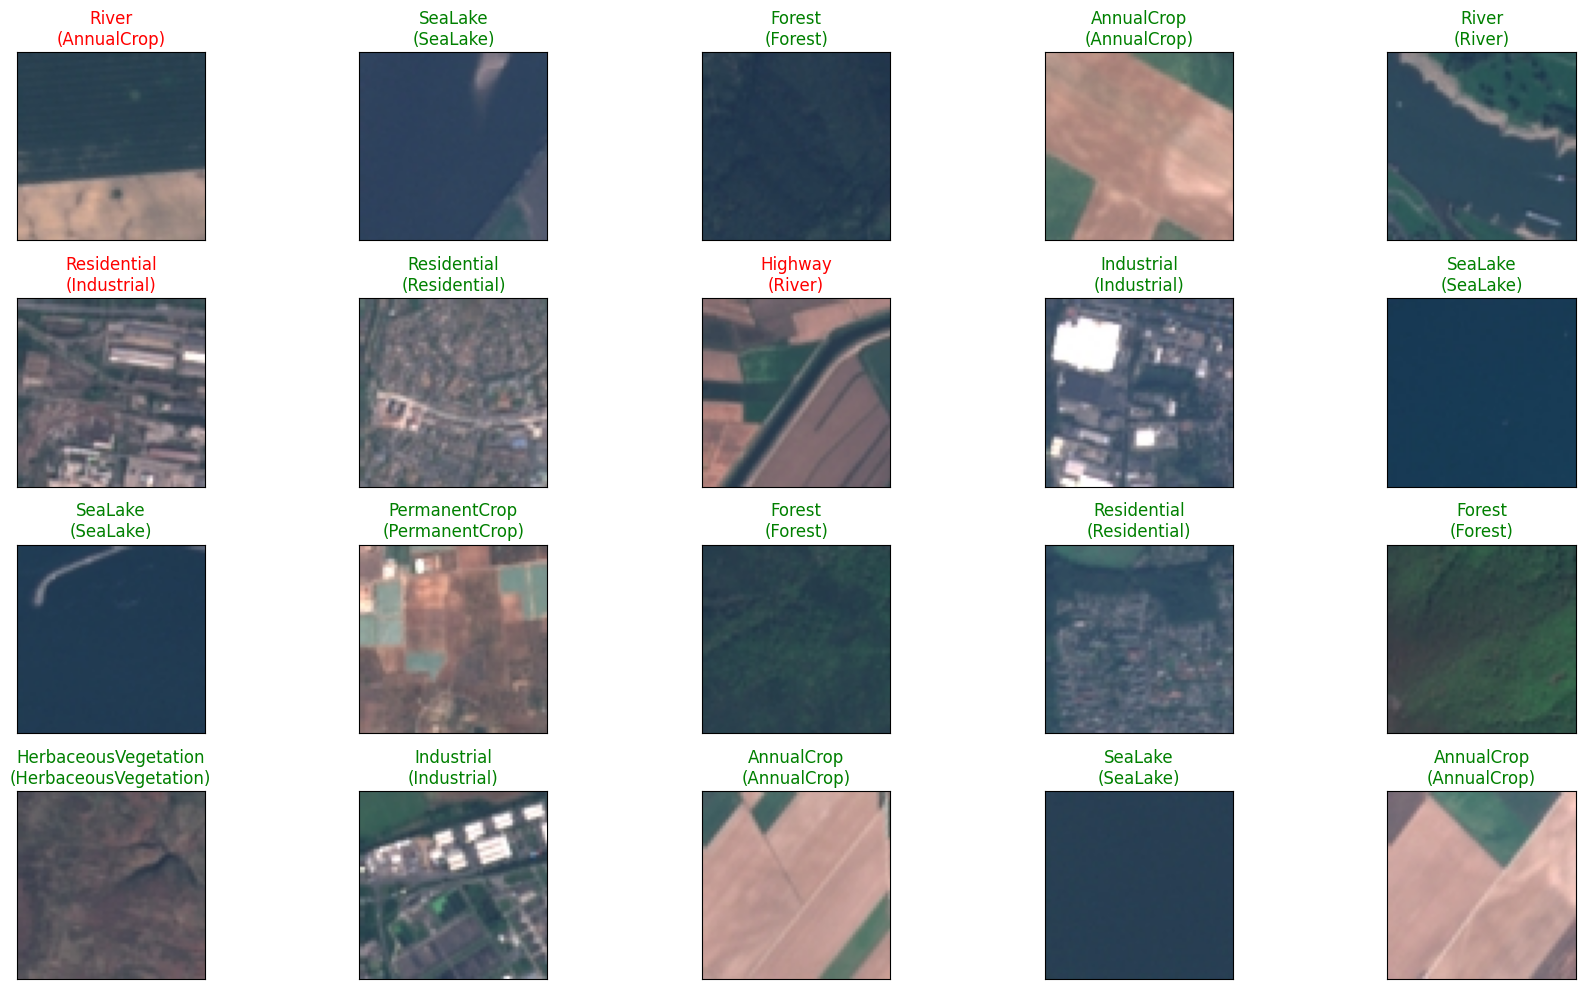

In [105]:
plot_predictions(true_classes, predictions, test_generator_new, class_indices)